In [36]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import photutils
import pandas as pd

In [2]:
SDSS = fits.open('/astro/users/chrism99/Desktop/LJ/Skyserver_SQL5_31_2019 9_30_40 PM.fits')

In [56]:
SDSS[1].data['objid']

array([1237671262809031310, 1237670964308345129, 1237671125370208477, ...,
       1237671124833665648, 1237670964308673209, 1237671125370536587])

In [3]:
SDSS[1].columns

ColDefs(
    name = 'objid'; format = '1K'
    name = 'ra'; format = '1D'
    name = 'dec'; format = '1D'
    name = 'u'; format = '1E'
    name = 'g'; format = '1E'
    name = 'r'; format = '1E'
    name = 'i'; format = '1E'
    name = 'z'; format = '1E'
)

In [4]:
SDSS[1].data['dec']

array([12.03065129, 11.8275747 , 11.82758886, ..., 11.64871142,
       11.93617363, 11.93616117])

In [14]:
#SDSS_outer = np.delete(SDSS,(11.775 < SDSS[1].data['dec'] > 11.825), axis=0) #delete row
#SDSS.remove(11.775 < SDSS[1].data['dec'] > 11.825) #& SDSS[1].data['dec'] > 11.825
#SDSS[1].data['dec'] > 11.825
#SDSS[1].data['ra'] < 132.8
#SDSS[1].data['ra'] > 132.85
InMask = np.where(((SDSS[1].data['ra'] < 133.025) & (SDSS[1].data['ra'] > 132.625)) & ((SDSS[1].data['dec'] < 12) & (SDSS[1].data['dec'] > 11.6)))
OutMask = np.where(((SDSS[1].data['ra'] > 133.025) | (SDSS[1].data['ra'] < 132.625)) | ((SDSS[1].data['dec'] > 12) | (SDSS[1].data['dec'] < 11.6)))

In [15]:
InMask

(array([ 4750,  4751,  4752, ..., 30911, 30912, 30913]),)

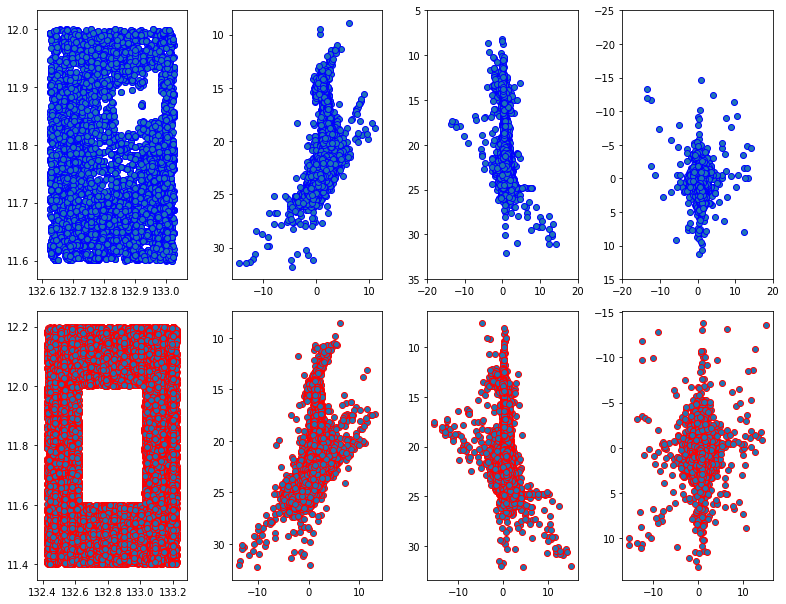

In [30]:
fig,ax = plt.subplots(2,4)                    # 2 plots wide and 4 plots tall
fig.set_size_inches(11,8.5)                   # (width,height) - letter paper landscape
fig.tight_layout()                            # Make better use of space on plot


ax[0,0].scatter(SDSS[1].data['ra'][InMask], SDSS[1].data['dec'][InMask], edgecolors="b")
ax[0,1].scatter((SDSS[1].data['u'][InMask] - SDSS[1].data['g'][InMask]), SDSS[1].data['g'][InMask], edgecolors="b")
ax[0,1].invert_yaxis()
ax[0,2].scatter((SDSS[1].data['r'][InMask] - SDSS[1].data['i'][InMask]), SDSS[1].data['r'][InMask], edgecolors="b")
ax[0,2].set_xlim(-20,20)
ax[0,2].set_ylim(5,35)
ax[0,2].invert_yaxis()
ax[0,3].scatter((SDSS[1].data['r'][InMask] - SDSS[1].data['i'][InMask]), (SDSS[1].data['u'][InMask] - SDSS[1].data['g'][InMask]), edgecolors="b")
ax[0,3].set_xlim(-20,20)
ax[0,3].set_ylim(-25,15)
ax[0,3].invert_yaxis()
ax[1,0].scatter(SDSS[1].data['ra'][OutMask], SDSS[1].data['dec'][OutMask], edgecolors="r")
ax[1,1].scatter((SDSS[1].data['u'][OutMask] - SDSS[1].data['g'][OutMask]), SDSS[1].data['g'][OutMask], edgecolors="r")
ax[1,1].invert_yaxis()
ax[1,2].scatter((SDSS[1].data['r'][OutMask] - SDSS[1].data['i'][OutMask]), SDSS[1].data['r'][OutMask], edgecolors="r")
ax[1,2].invert_yaxis()
ax[1,3].scatter((SDSS[1].data['r'][OutMask] - SDSS[1].data['i'][OutMask]), (SDSS[1].data['u'][OutMask] - SDSS[1].data['g'][OutMask]), edgecolors="r")
ax[1,3].invert_yaxis()

In [53]:
Match = pd.read_csv("/astro/users/chrism99/Desktop/LJ/MAST_Crossmatch_SDSS.csv")

In [54]:
Match

,#Observation Type,Mission,Instrument,Project,Filters,Waveband,Target Name,Target Classification,Observation ID,RA,...,Extinction (g),Extinction (r),Extinction (i),Extinction (z),HTM ID,Field ID,Spectrum Object,Size,Unnamed: 115,Unnamed: 116
0,#@string,string,string,string,string,string,string,string,string,ra,...,float,float,float,float,string,string,float,float,NaN,NaN
1,intentType,obs_collection,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,...,extinction_g,extinction_r,extinction_i,extinction_z,htmID,fieldID,specObjID,size,NaN,NaN
2,science,SWIFT,UVOT,NaN,UVW2,UV,OPTICAL,NGC2682,NaN,91064001,...,0.1482283,0.1154985,0.07990133,0.05937525,0.04416428,16298259338373,1.23767112537034E+018,0,2.507777,NaN
3,science,SWIFT,UVOT,NaN,UVW1,UV,OPTICAL,NGC2682,NaN,91064001,...,0.1482283,0.1154985,0.07990133,0.05937525,0.04416428,16298259338373,1.23767112537034E+018,0,2.507777,NaN
4,science,SWIFT,UVOT,NaN,UVM2,UV,NGC2682,NaN,91064001,132.820934668248,...,0.1154985,0.07990133,0.05937525,0.04416428,16298259338373,1.23767112537034E+018,0,2.50777694344196,NaN,NaN
5,science,K2,Kepler,hlsp_k2sff,kepler,OPTICAL,k2sff211402320,NaN,k2sff211402320-c05_lc,132.873184,...,0.09521379,0.06586845,0.04894732,0.03640781,16298244855298,1.23767126227229E+018,0,1.28681426073069,NaN,NaN
6,science,K2,Kepler,hlsp_k2sff,kepler,OPTICAL,k2sff211406012,NaN,k2sff211406012-c05_lc,132.637878,...,0.09640031,0.06668928,0.04955728,0.03686152,16298222507785,1.23767096430841E+018,0,1.29233648509134,NaN,NaN
7,science,K2,Kepler,hlsp_k2sff,kepler,OPTICAL,k2sff211421224,NaN,k2sff211421224-c05_lc,132.716354,...,0.1086811,0.07518506,0.05587056,0.04155743,16298198790495,1.23767112537034E+018,0,2.35092184775265,NaN,NaN
8,science,K2,Kepler,hlsp_k2sff,kepler,OPTICAL,k2sff211402860,NaN,k2sff211402860-c05_lc,132.827759,...,0.09668909,0.06688907,0.04970574,0.03697194,16298247021830,1.23767126227223E+018,0,1.33448878033218,NaN,NaN
9,science,K2,Kepler,hlsp_k2sff,kepler,OPTICAL,k2sff211402191,NaN,k2sff211402191-c05_lc,132.987778,...,0.08533892,0.05903707,0.04387087,0.03263187,16298237510754,1.23767126227229E+018,5.95733112043757E+018,1.20018210221447,NaN,NaN


In [83]:
MatchDif = Match[' RA'][4:1450].astype(float) - Match[' Match RA'][4:1450].astype(float)
print(MatchDif.mean())
MatchDif.std()

1.945669144855539e-05


2.9962425620166514e-05

IndexError: too many indices for array

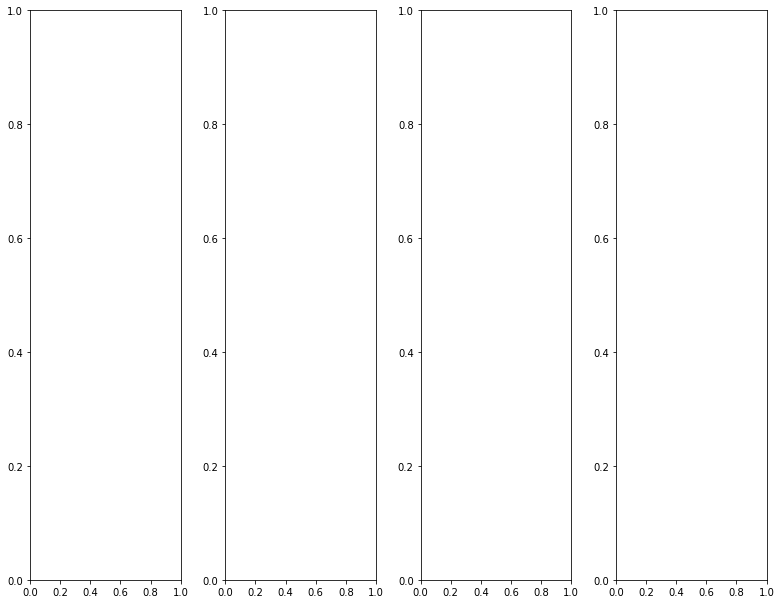

In [92]:
fig,ax = plt.subplots(1,4)                    # 2 plots wide and 4 plots tall
fig.set_size_inches(11,8.5)                   # (width,height) - letter paper landscape
fig.tight_layout()                            # Make better use of space on plot


ax[0,0].scatter(Match[' RA'][4:1450].astype(float), Match[' Dec'][4:1450].astype(float), edgecolors="b")
ax[0,1].scatter((Match[' Best Fit (u)'][4:1450].astype(float) - Match[' Best Fit (g)'][4:1450].astype(float)), Match[' Best Fit (g)'][4:1450].astype(float), edgecolors="b")
ax[0,1].invert_yaxis()
ax[0,2].scatter((Match[' Best Fit (r)'][4:1450].astype(float) - Match[' Best Fit (i)'][4:1450].astype(float)), Match[' Best Fit (r)'][4:1450].astype(float), edgecolors="b")
ax[0,2].set_xlim(-20,20)
ax[0,2].set_ylim(5,35)
ax[0,2].invert_yaxis()
ax[0,3].scatter((Match[' Best Fit (r)'][4:1450].astype(float) - Match[' Best Fit (i)'][4:1450].astype(float)), (Match[' Best Fit (u)'][4:1450].astype(float) - Match[' Best Fit (g)'][4:1450].astype(float)), edgecolors="b")
ax[0,3].set_xlim(-20,20)
ax[0,3].set_ylim(-25,15)
ax[0,3].invert_yaxis()

In [90]:
Match[' Dec'][4:1450].astype(float)

4       11.836727
5       11.676159
6       11.732980
7       11.958737
8       11.685089
9       11.674133
10      11.681758
11      11.899219
12      11.712908
13      11.706198
14      11.791916
15      11.800300
16      11.695279
17      11.694791
18      11.963179
19      11.836059
20      11.782229
21      11.980812
22      11.903281
23      11.681179
24      11.801414
25      11.826262
26      11.944543
27      11.607483
28      11.669521
29      11.659408
30      11.837975
31      11.649075
32      11.938687
33      11.639571
          ...    
1420    11.763168
1421    11.763168
1422    11.763168
1423    11.763168
1424    11.763168
1425    11.814659
1426    11.749258
1427    11.792353
1428    11.765803
1429    11.649660
1430    11.744703
1431    12.009090
1432    11.693774
1433    11.920176
1434    11.667169
1435    11.802592
1436    11.752048
1437    11.976955
1438    11.724744
1439    11.637233
1440    11.964702
1441    11.803798
1442    11.982894
1443    11.948075
1444    11